In [7]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
from ase.io import read
from abtem.tilt import precession_tilts

(examples:ped_quickstart)=
# PED quickstart

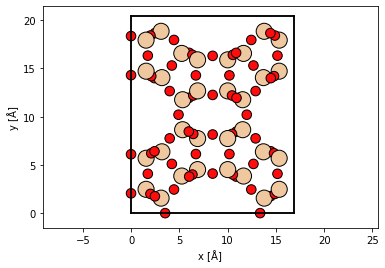

In [23]:
atoms = read("data/SiO2_zeolite.cif")

cell = atoms.cell.copy()

atoms *= (1, 1, 1)

abtem.show_atoms(atoms, plane="xy");

In [24]:
frozen_phonons = abtem.FrozenPhonons(atoms, 1, sigmas=0.078)

In [25]:
potential = abtem.Potential(
    frozen_phonons,
    gpts=768,
    projection="infinite",
    slice_thickness=2,
    # exit_planes=10,
)

In [26]:
wave = abtem.PlaneWave(energy=100e3)
wave.grid.match(potential)

wave.metadata

{'energy': 100000.0,
 'base_tilt_x': 0.0,
 'base_tilt_y': 0.0,
 'normalization': 'values'}

In [27]:
wave.tilt = precession_tilts(50, 10)

In [30]:
measurement = (
    wave.multislice(potential)
    .diffraction_patterns()
    .mean(0)
)

measurement.compute()

[########################################] | 100% Completed | 658.33 ms


In [31]:
measurement[4].sum()

0.9999968

In [15]:
spots = measurement[4].index_diffraction_spots(cell=cell).remove_low_intensity()

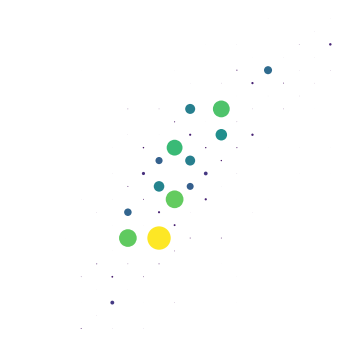

In [16]:
fig, ax = spots.show(spot_scale=1.5, overlay_indices=False)
ax.axis("off")
plt.savefig("../thumbnails/ped_quickstart.png", bbox_inches="tight", pad_inches=0)